In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.2/566.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8c3bdea485e13b92dec4f7bb84c2dd99d414e2c7c1561026c493e1684b954111
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/yolov8_pothole_detection

/content/gdrive/MyDrive/yolov8_pothole_detection


In [ ]:
!curl -L "https://universe.roboflow.com/ds/JUsg08AHMf?key=gHDxWFQiHm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/img_0827_jpg.rf.ae361cb582cab025c47e66578e42ea35.jpg  
 extracting: train/images/img_0828_jpg.rf.1106168981ee6d78179148087f37bf47.jpg  
 extracting: train/images/img_0828_jpg.rf.3421b2f865bcf13331d0c31108eaa0b9.jpg  
 extracting: train/images/img_0828_jpg.rf.86d41dc8dedb74b1a2e1c5afba6ecede.jpg  
 extracting: train/images/img_0830_jpg.rf.1be4e84e746e7f02e67aa2268faf0166.jpg  
 extracting: train/images/img_0830_jpg.rf.2add15ee27892622f3e7bf1e1dc2e2d2.jpg  
 extracting: train/images/img_0830_jpg.rf.8d3cb8b09118b8b09a3a3d390fe0301b.jpg  
 extracting: train/images/img_0831_jpg.rf.b7d0df54615753de5480596d31fa313f.jpg  
 extracting: train/images/img_0831_jpg.rf.d4d37c5b0d0158be77cc7bd0b405cd81.jpg  
 extracting: train/images/img_0831_jpg.rf.f0633c1d86ab4707e2cb860d10ba6c32.jpg  
 extracting: train/images/img_0832_jpg.rf.298af72a8437240adc8e31cf658b1c17.jpg  
 extracting: train/images/img_0832_jpg.rf.30f1a5963e4aed5a

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

In [ ]:
model.train(data="data.yaml", epochs=50)  # train the model

100%|██████████| 6.23M/6.23M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [ ]:
metrics = model.val() 


image 1/1 /content/gdrive/MyDrive/yolov8_pothole_detection/0_EMB-PAY-THP_CHP_180423Slug_3043JPG.jpg: 384x640 1 pothole, 7.2ms
Speed: 0.6ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


tensor([0.8767], device='cuda:0')


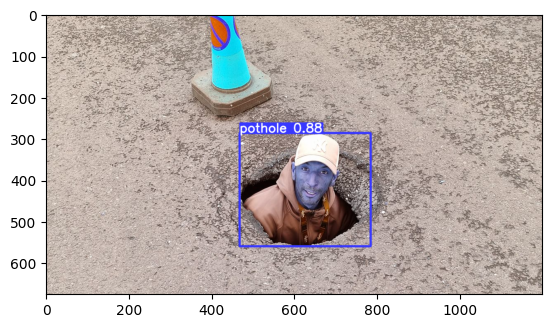

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torch


results = model("/content/gdrive/MyDrive/yolov8_pothole_detection/0_EMB-PAY-THP_CHP_180423Slug_3043JPG.jpg")  # predict on an image

probability_threshold = 0.5
boxes = []

for i in range(len(results[0].boxes.conf)):
    if results[0].boxes.conf[i] >= probability_threshold:
        boxes.append(results[0].boxes[i])

results[0].boxes = boxes

res_plotted = results[0].plot()
plt.imshow(res_plotted)

In [ ]:
video_path = "/content/gdrive/MyDrive/yolov8_pothole_detection/stock-footage-a-very-bad-road-a-road-with-lots-of-holes-gnarled-road-hike-on-a-mountain-road.webm"
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'),fps , (w,h))

while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        boxes = []

        for i in range(len(results[0].boxes.conf)):
            if results[0].boxes.conf[i] >= probability_threshold:
                boxes.append(results[0].boxes[i])

        results[0].boxes = boxes

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        output.write(annotated_frame)
    else:
        # Break the loop if the end of the video is reached
        break

cap.release()
output.release()


0: 384x640 4 potholes, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 6.1ms
Speed: 0.4ms preprocess, 6.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 7.5ms
Speed: 0.4ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 5.8ms
Speed: 0.4ms preprocess, 5.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 6.1ms
Speed: 0.5ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 5.9ms
Speed: 0.9ms preprocess, 5.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 6.3ms
Speed: 0.7ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 potholes, 5.8ms
Speed: 0.4ms preprocess, 5.8ms inference, 1.6ms postprocess per image at shape (1, 3, 

In [ ]:
success = model.export()  # export the model to ONNX format